In [79]:
import pandas as pd
df = pd.read_csv('../data/preprocessed_df.csv')

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)  
df.head(3)

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual/queer,heterosexual,homosexual,income,romantic_relationship_intent,education_level_grouped,location_density,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count,interest_lifestyle,interest_health,interest_creativity,interest_education_culture,interest_entertainment,interest_social
0,0,1,0,0,0,0,0,1,2,0,1,2,0,1,0,0,56,44,173,0.36,75,0.333333,0.333333,0.000000,0.333333,0.000000,0.0
1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,40,301,107,0.42,35,0.333333,0.000000,0.333333,0.333333,0.000000,0.0
2,0,0,0,1,0,1,0,0,0,2,2,1,0,0,1,0,30,309,91,0.41,33,0.000000,0.000000,0.333333,0.333333,0.333333,0.0


In [80]:
features_to_scale = ['income', 'romantic_relationship_intent', 'education_level_grouped','location_density',
                     'age', 'bio_length',	'likes_received',	'emoji_usage_rate',	'message_sent_count',
                     'interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                     'interest_entertainment',	'interest_social']
other_features = [col for col in df.columns if col not in features_to_scale]

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_to_scale])

In [82]:
from sklearn.cluster import KMeans
import numpy as np

X = np.hstack((X_scaled, df[other_features].values))

rg = range(2, 15)
within_cluster_distance = []

for k in rg:
    k_means = KMeans(n_clusters= k, random_state=42)
    k_means.fit(X)
    within_cluster_distance.append(np.sqrt(k_means.inertia_))

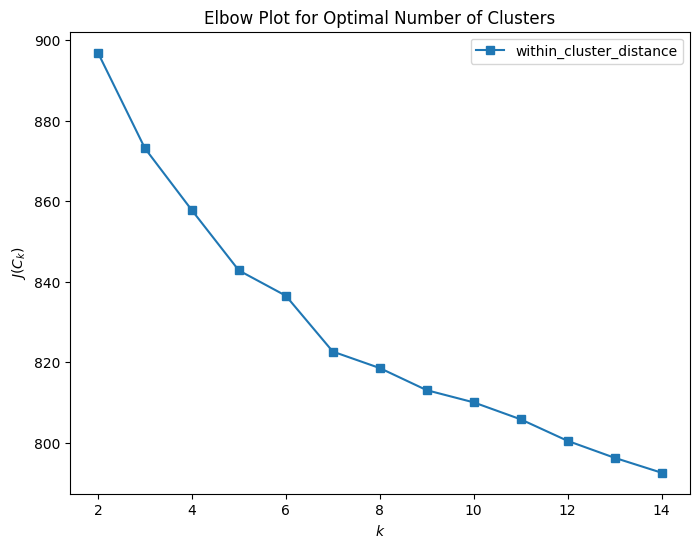

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(rg, within_cluster_distance, marker='s', label='within_cluster_distance')

plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.legend()

plt.show()

In [84]:
# According to the previous image, I selected 5 as the elbow for k 
kmeans = KMeans(n_clusters= 5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

cluster
1    12434
4    11195
3    10915
0    10384
2     5072
Name: count, dtype: int64


Analysing the clusters grouping 

In [85]:
clusters_means = df.groupby('cluster').mean()
clusters_means

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual/queer,heterosexual,homosexual,income,romantic_relationship_intent,education_level_grouped,location_density,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count,interest_lifestyle,interest_health,interest_creativity,interest_education_culture,interest_entertainment,interest_social
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.166988,0.168721,0.164195,0.500096,0.121052,0.503659,0.125674,0.249615,1.015697,0.842065,1.106895,0.990851,0.245474,0.253371,0.246629,0.254526,38.414676,249.538136,99.411210,0.287080,49.580027,0.144132,0.106317,0.157807,0.107345,0.126188,0.358211
1,0.168329,0.172511,0.163182,0.495979,0.129323,0.494209,0.119591,0.256876,1.006836,0.843011,1.118144,0.986650,0.251890,0.252855,0.247547,0.247708,38.489625,248.928422,99.510938,0.285841,50.084446,0.112997,0.424615,0.123211,0.151976,0.178864,0.008337
2,0.169361,0.169756,0.166995,0.493888,0.122634,0.497240,0.134661,0.245465,1.026025,0.812894,1.124211,1.013604,0.255521,0.240142,0.253746,0.250591,38.518139,250.493099,99.703864,0.288953,49.518336,0.071898,0.062894,0.078536,0.066509,0.687829,0.032334
3,0.171782,0.159322,0.169766,0.499130,0.128447,0.496564,0.124599,0.250389,0.990472,0.839120,1.104077,0.987540,0.251306,0.251122,0.250573,0.247000,38.407421,251.099130,99.335685,0.284129,50.423546,0.353947,0.111070,0.394869,0.000000,0.140113,0.000000
4,0.162841,0.164180,0.162662,0.510317,0.121929,0.506208,0.133184,0.238678,1.001608,0.834569,1.108441,0.999017,0.257972,0.248325,0.248504,0.245199,38.574096,251.102456,99.754355,0.286578,50.422331,0.185589,0.018103,0.204645,0.434152,0.148400,0.009111


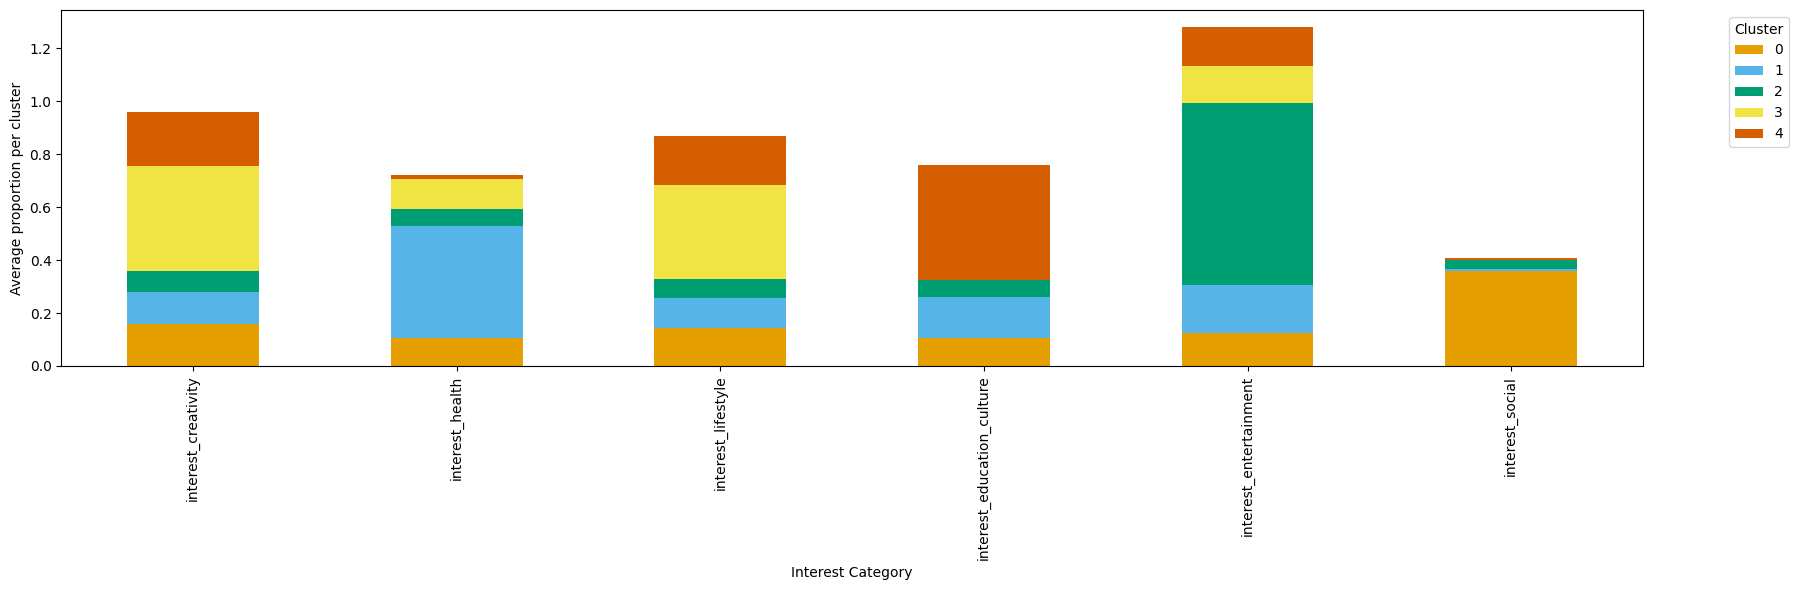

In [86]:
interest_cols = ['interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                    'interest_entertainment', 'interest_social']


interest_per_cluster = df.groupby('cluster')[interest_cols].mean()
percent = interest_per_cluster.T

colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00', '#CC79A7', "#7D0CFF"]

percent.plot(kind='bar', stacked=True, figsize=(18, 6), color=colors)
plt.ylabel('Average proportion per cluster')
plt.xlabel('Interest Category')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Trying with the same amount of clusters from the baseline

In [87]:
kmeans = KMeans(n_clusters= 5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

cluster
1    12434
4    11195
3    10915
0    10384
2     5072
Name: count, dtype: int64


In [88]:
clusters_means = df.groupby('cluster').mean()
clusters_means

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual/queer,heterosexual,homosexual,income,romantic_relationship_intent,education_level_grouped,location_density,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count,interest_lifestyle,interest_health,interest_creativity,interest_education_culture,interest_entertainment,interest_social
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.166988,0.168721,0.164195,0.500096,0.121052,0.503659,0.125674,0.249615,1.015697,0.842065,1.106895,0.990851,0.245474,0.253371,0.246629,0.254526,38.414676,249.538136,99.411210,0.287080,49.580027,0.144132,0.106317,0.157807,0.107345,0.126188,0.358211
1,0.168329,0.172511,0.163182,0.495979,0.129323,0.494209,0.119591,0.256876,1.006836,0.843011,1.118144,0.986650,0.251890,0.252855,0.247547,0.247708,38.489625,248.928422,99.510938,0.285841,50.084446,0.112997,0.424615,0.123211,0.151976,0.178864,0.008337
2,0.169361,0.169756,0.166995,0.493888,0.122634,0.497240,0.134661,0.245465,1.026025,0.812894,1.124211,1.013604,0.255521,0.240142,0.253746,0.250591,38.518139,250.493099,99.703864,0.288953,49.518336,0.071898,0.062894,0.078536,0.066509,0.687829,0.032334
3,0.171782,0.159322,0.169766,0.499130,0.128447,0.496564,0.124599,0.250389,0.990472,0.839120,1.104077,0.987540,0.251306,0.251122,0.250573,0.247000,38.407421,251.099130,99.335685,0.284129,50.423546,0.353947,0.111070,0.394869,0.000000,0.140113,0.000000
4,0.162841,0.164180,0.162662,0.510317,0.121929,0.506208,0.133184,0.238678,1.001608,0.834569,1.108441,0.999017,0.257972,0.248325,0.248504,0.245199,38.574096,251.102456,99.754355,0.286578,50.422331,0.185589,0.018103,0.204645,0.434152,0.148400,0.009111


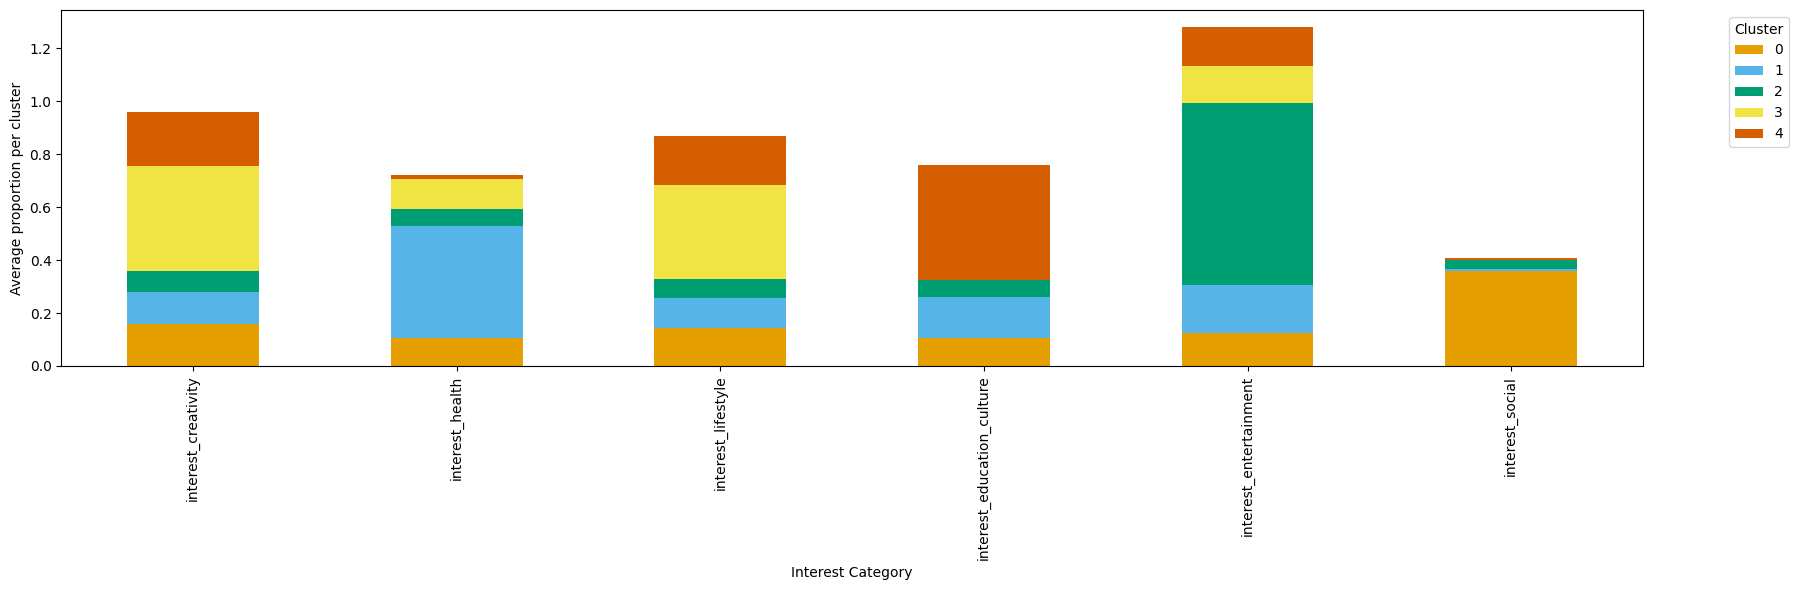

In [89]:
interest_cols = ['interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                    'interest_entertainment', 'interest_social']


interest_per_cluster = df.groupby('cluster')[interest_cols].mean()
percent = interest_per_cluster.T

percent.plot(kind='bar', stacked=True, figsize=(18, 6), color=colors)
plt.ylabel('Average proportion per cluster')
plt.xlabel('Interest Category')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()